Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



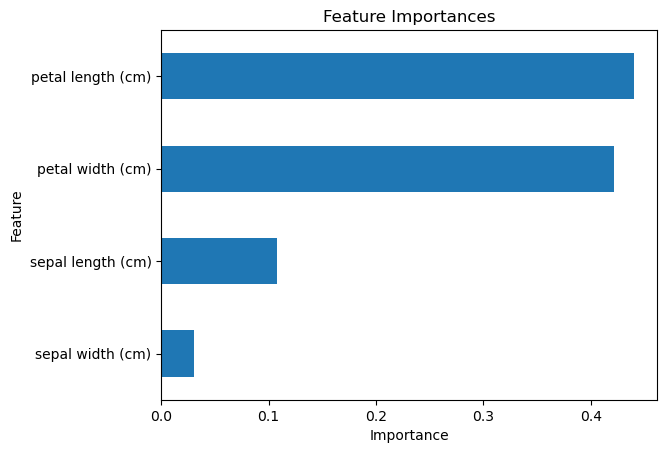

C:\Users\User\AppData\Local\Temp\ipykernel_11640\3521741515.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette='viridis')


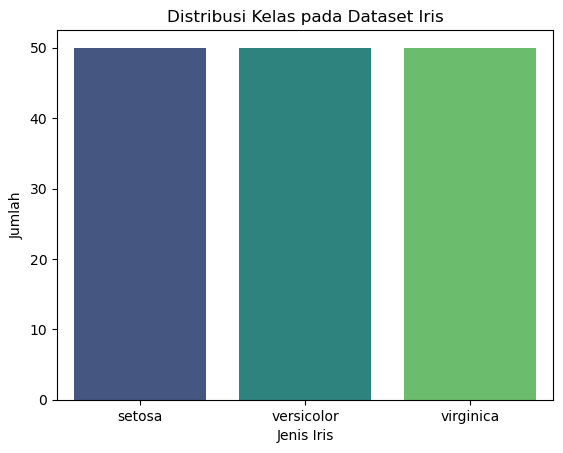

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memuat dataset Iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# 2. Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['target'])
y = df['target']

# 3. Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Memprediksi data uji
y_pred = model.predict(X_test)

# 6. Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=dataset.target_names)

# 7. Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

# 8. Visualisasi fitur penting
feature_importances = pd.Series(model.feature_importances_, index=dataset.feature_names)
feature_importances.sort_values(ascending=True).plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 9. Visualisasi distribusi kelas
sns.countplot(x=df['target'], palette='viridis')
plt.xticks(ticks=[0, 1, 2], labels=dataset.target_names)
plt.title('Distribusi Kelas pada Dataset Iris')
plt.xlabel('Jenis Iris')
plt.ylabel('Jumlah')
plt.show()
